# Clean Air Delivery Rate: Which component to prioritize? Efficiency or Flow?

$$
\begin{equation}
\begin{aligned}
  CADR &= f_{eff} \cdot Q
\end{aligned}
\end{equation}
$$

where $f_{eff}$ is the filtration efficiency (between 0 and 1) and $Q$ is the flow of air (cubic feet per minute).

One question that people have is whether or not they should prioritize HEPA air cleaners over ones with lower filtration efficiency. Is having a high filtration efficiency always desirable?

To answer this question, imagine a room with an infector, emitting infectious air at a constant rate $G$ (cubic feet per minute). In a well-mixed space, the infinitesimal change in concentration of air that can be inhaled over time is:

$$
\begin{equation}
\begin{aligned}
  \frac{dC}{dt} &= \frac{G + Q \cdot ((1 - f_{eff}) \cdot C_t - C_t)}{V}
\end{aligned}
\end{equation}
$$

where $Q$ is the flow of air, $1 - f_{eff}$ is the concentration of dirty air "produced" by the air cleaner $C_t$ as the concentration at time $t$, and $G$ is the infectious air produced by the infector, and $V$ is the room volume.

What does the above say? 
- The air cleaner pulls in air at a speed of $Q$. 
- That air has a concentration of $C_t$. 
- The air goes through the air cleaner and what comes out is the same amount of air, but with a concentration of $1-f_{eff}$, where $f_{eff}$ is the filtration efficiency. 

Finally, while all of that is going on, the infector is generating dirty air at a rate $G$. 

Assuming the air is well-mixed, then the change in concentration of dirty air is the amount of dirty air divided by the total volume of the room $V$. 


## High efficiency with lower flow vs. DIY w/ less efficient, but much higher flow

| Type | Filter | Filter Efficiency (0.3 - 1 microns) | Flow (CFM) | Flow (ft3 / sec) | CADR estimate (CFM)  | 
| - | - | - | - | - | - |
| Coway AP-1512HH | True-HEPA | 0.99 | 220 | 3.666 | 217.7 |
| CR box | MERV-13 | 0.58 | 500 | 8.333 | 290.8 |

Let's compare the Coway AP-1512HH and a CR box from above. AP-1512HH pushes through 220 CFM of clean air, as estimated with an anemometer. Let's say 99% of that is clean air, so we get 217.7 CFM out of it.

On the other hand, the CR box pushes much more air out. At speed 1, let's say we get 500 CFM of air through the filters. However, since we're using less efficient filters like MERV-13, let's say we're getting 0.58 out of that. So we get 290.8 CFM out of a CR box at speed 1.

What happens when we plug this information into the equation above to produce the concentration curve?


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def change_in_conc_over_time(q, c_f, c_t, G, V):
    return (q * ((1-c_f) * c_t - c_t) + G) / V

In [77]:
cr_box = [0]
coway = [0]

G = 0.0028 # cubic feet per second
V = 9000 # cubic feet

for i in range(1, 7200):
    cr_box.append(
        cr_box[i-1] + change_in_conc_over_time(q=8.333, c_f=0.58, c_t=cr_box[i-1], G=G, V=V)
    )
    
    coway.append(
        coway[i-1] + change_in_conc_over_time(q=3.666, c_f=0.99, c_t=coway[i-1], G=G, V=V)
    )
    
#change_in_conc_over_time(q=500, c_p=1-0.58, c_t_minus_1=c_t_minus_1, G=0.169, V=9000)

Text(0.5, 0, 'duration (seconds)')

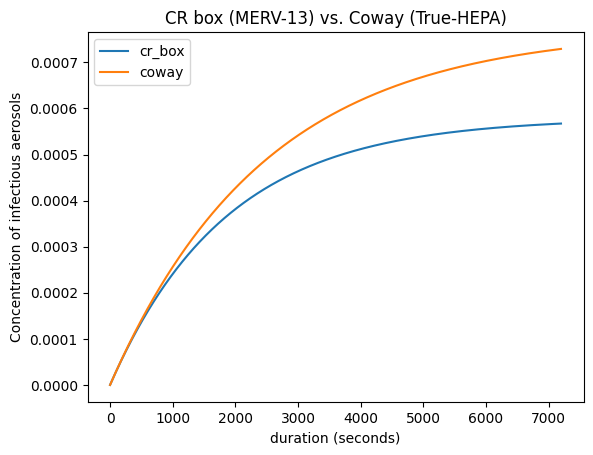

In [79]:
fig, ax = plt.subplots(1,1)
pd.Series(cr_box).plot(ax=ax)
pd.Series(coway).plot(ax=ax)

ax.legend(['cr_box', 'coway'])

ax.set_ylabel("Concentration of infectious aerosols")
ax.set_title("CR box (MERV-13) vs. Coway (True-HEPA)")
ax.set_xlabel("duration (seconds)")

## Conclusion

The dose of infectious aerosols a susceptible gets is the integral of the curves above over time. **The lower the curve, the smaller the dose one incurs.** As the plots show, the CR-box, even though it uses filters with lower filtration efficiency, can outperform HEPAs in terms of lowering the dose.